3090 - pth-gpu, kernel died

3090 - pth25gpu - OK

In [1]:
# %run main.py

Using device: cuda
GPU: NVIDIA GeForce RTX 3090
Random seeds set to 42

Loading CIFAR10 dataset...
Files already downloaded and verified
Files already downloaded and verified


c:\Users\m.amintoosi\.conda\envs\pth25gpu\lib\site-packages\torch\utils\data\dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:29: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Dataset loaded: 10 classes

Training with SGD optimizer


Epoch 1/20:   0%|          | 0/98 [00:00<?, ?it/s]D:\git\mamintoosi-papers-codes\SR-Adam\training.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s] 
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:81: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/20 | Train Loss: 2.2639 | Train Acc: 16.47% | Test Loss: 2.2015 | Test Acc: 22.74% | Time: 120.89s


Epoch 2/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 2/20 | Train Loss: 2.1349 | Train Acc: 23.83% | Test Loss: 2.0400 | Test Acc: 27.96% | Time: 112.54s


Epoch 3/20: 100%|██████████| 98/98 [01:01<00:00,  1.59it/s] 


Epoch 3/20 | Train Loss: 2.0168 | Train Acc: 27.65% | Test Loss: 1.9419 | Test Acc: 31.59% | Time: 111.22s


Epoch 4/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 4/20 | Train Loss: 1.9497 | Train Acc: 29.53% | Test Loss: 1.8938 | Test Acc: 32.61% | Time: 114.34s


Epoch 5/20: 100%|██████████| 98/98 [01:05<00:00,  1.51it/s] 


Epoch 5/20 | Train Loss: 1.8958 | Train Acc: 31.94% | Test Loss: 1.8444 | Test Acc: 34.74% | Time: 116.98s


Epoch 6/20: 100%|██████████| 98/98 [01:01<00:00,  1.59it/s] 


Epoch 6/20 | Train Loss: 1.8515 | Train Acc: 33.65% | Test Loss: 1.8249 | Test Acc: 34.86% | Time: 111.23s


Epoch 7/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 7/20 | Train Loss: 1.8040 | Train Acc: 35.23% | Test Loss: 1.7660 | Test Acc: 36.33% | Time: 119.14s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 8/20 | Train Loss: 1.7601 | Train Acc: 36.71% | Test Loss: 1.7414 | Test Acc: 36.98% | Time: 114.95s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 9/20 | Train Loss: 1.7228 | Train Acc: 38.06% | Test Loss: 1.6709 | Test Acc: 39.82% | Time: 115.47s


Epoch 10/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 10/20 | Train Loss: 1.6928 | Train Acc: 39.17% | Test Loss: 1.6497 | Test Acc: 40.55% | Time: 113.30s


Epoch 11/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 11/20 | Train Loss: 1.6581 | Train Acc: 39.91% | Test Loss: 1.6147 | Test Acc: 42.05% | Time: 113.78s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 12/20 | Train Loss: 1.6289 | Train Acc: 41.31% | Test Loss: 1.5848 | Test Acc: 42.54% | Time: 113.06s


Epoch 13/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 13/20 | Train Loss: 1.6097 | Train Acc: 41.86% | Test Loss: 1.5247 | Test Acc: 44.93% | Time: 114.67s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 14/20 | Train Loss: 1.5916 | Train Acc: 42.28% | Test Loss: 1.4918 | Test Acc: 46.83% | Time: 113.66s


Epoch 15/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 15/20 | Train Loss: 1.5681 | Train Acc: 43.38% | Test Loss: 1.4884 | Test Acc: 46.89% | Time: 115.29s


Epoch 16/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 16/20 | Train Loss: 1.5513 | Train Acc: 44.05% | Test Loss: 1.4839 | Test Acc: 46.67% | Time: 113.26s


Epoch 17/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 17/20 | Train Loss: 1.5383 | Train Acc: 44.29% | Test Loss: 1.4432 | Test Acc: 48.16% | Time: 113.43s


Epoch 18/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 18/20 | Train Loss: 1.5148 | Train Acc: 45.32% | Test Loss: 1.4420 | Test Acc: 48.58% | Time: 113.14s


Epoch 19/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 19/20 | Train Loss: 1.5064 | Train Acc: 45.63% | Test Loss: 1.4528 | Test Acc: 47.53% | Time: 114.82s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 20/20 | Train Loss: 1.4835 | Train Acc: 46.36% | Test Loss: 1.4022 | Test Acc: 49.33% | Time: 114.48s

Training with Momentum optimizer


Epoch 1/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 1/20 | Train Loss: 2.0306 | Train Acc: 26.26% | Test Loss: 1.7613 | Test Acc: 36.05% | Time: 115.36s


Epoch 2/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 2/20 | Train Loss: 1.6785 | Train Acc: 38.98% | Test Loss: 1.4871 | Test Acc: 45.55% | Time: 113.45s


Epoch 3/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 3/20 | Train Loss: 1.5363 | Train Acc: 43.96% | Test Loss: 1.4614 | Test Acc: 47.70% | Time: 113.15s


Epoch 4/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 4/20 | Train Loss: 1.4569 | Train Acc: 47.58% | Test Loss: 1.3131 | Test Acc: 52.71% | Time: 112.95s


Epoch 5/20: 100%|██████████| 98/98 [01:01<00:00,  1.59it/s] 


Epoch 5/20 | Train Loss: 1.3933 | Train Acc: 49.67% | Test Loss: 1.2400 | Test Acc: 55.71% | Time: 112.47s


Epoch 6/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 6/20 | Train Loss: 1.3223 | Train Acc: 52.64% | Test Loss: 1.1722 | Test Acc: 59.29% | Time: 115.03s


Epoch 7/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 7/20 | Train Loss: 1.2643 | Train Acc: 54.61% | Test Loss: 1.1059 | Test Acc: 61.00% | Time: 113.08s


Epoch 8/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 8/20 | Train Loss: 1.2228 | Train Acc: 56.17% | Test Loss: 1.0799 | Test Acc: 62.21% | Time: 113.21s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 9/20 | Train Loss: 1.1686 | Train Acc: 58.05% | Test Loss: 1.0269 | Test Acc: 64.48% | Time: 114.94s


Epoch 10/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 10/20 | Train Loss: 1.1368 | Train Acc: 59.45% | Test Loss: 0.9905 | Test Acc: 65.23% | Time: 112.77s


Epoch 11/20: 100%|██████████| 98/98 [01:01<00:00,  1.59it/s] 


Epoch 11/20 | Train Loss: 1.1010 | Train Acc: 60.89% | Test Loss: 0.9759 | Test Acc: 65.96% | Time: 111.72s


Epoch 12/20: 100%|██████████| 98/98 [01:05<00:00,  1.51it/s] 


Epoch 12/20 | Train Loss: 1.0805 | Train Acc: 61.63% | Test Loss: 0.9672 | Test Acc: 66.27% | Time: 116.70s


Epoch 13/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 13/20 | Train Loss: 1.0487 | Train Acc: 62.91% | Test Loss: 0.9358 | Test Acc: 67.05% | Time: 115.29s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 14/20 | Train Loss: 1.0177 | Train Acc: 63.82% | Test Loss: 0.9054 | Test Acc: 68.73% | Time: 113.38s


Epoch 15/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 15/20 | Train Loss: 0.9978 | Train Acc: 64.65% | Test Loss: 0.8864 | Test Acc: 69.29% | Time: 115.24s


Epoch 16/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 16/20 | Train Loss: 0.9774 | Train Acc: 65.26% | Test Loss: 0.8649 | Test Acc: 70.09% | Time: 114.13s


Epoch 17/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 17/20 | Train Loss: 0.9609 | Train Acc: 66.05% | Test Loss: 0.8422 | Test Acc: 70.78% | Time: 111.63s


Epoch 18/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 18/20 | Train Loss: 0.9500 | Train Acc: 66.69% | Test Loss: 0.8461 | Test Acc: 70.60% | Time: 115.25s


Epoch 19/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 19/20 | Train Loss: 0.9251 | Train Acc: 67.15% | Test Loss: 0.8294 | Test Acc: 71.08% | Time: 113.38s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 20/20 | Train Loss: 0.9092 | Train Acc: 67.88% | Test Loss: 0.8122 | Test Acc: 72.38% | Time: 116.17s

Training with Adam optimizer


Epoch 1/20: 100%|██████████| 98/98 [01:14<00:00,  1.32it/s] 


Epoch 1/20 | Train Loss: 1.7889 | Train Acc: 34.43% | Test Loss: 1.4588 | Test Acc: 46.55% | Time: 125.32s


Epoch 2/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 2/20 | Train Loss: 1.4548 | Train Acc: 47.39% | Test Loss: 1.2507 | Test Acc: 55.84% | Time: 118.89s


Epoch 3/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 3/20 | Train Loss: 1.3313 | Train Acc: 52.11% | Test Loss: 1.1784 | Test Acc: 58.55% | Time: 118.47s


Epoch 4/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 4/20 | Train Loss: 1.2399 | Train Acc: 55.45% | Test Loss: 1.0509 | Test Acc: 63.37% | Time: 116.54s


Epoch 5/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 5/20 | Train Loss: 1.1699 | Train Acc: 58.32% | Test Loss: 1.0021 | Test Acc: 64.77% | Time: 115.69s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 6/20 | Train Loss: 1.1088 | Train Acc: 60.71% | Test Loss: 0.9812 | Test Acc: 65.60% | Time: 115.48s


Epoch 7/20: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s] 


Epoch 7/20 | Train Loss: 1.0738 | Train Acc: 61.80% | Test Loss: 0.9300 | Test Acc: 67.95% | Time: 120.68s


Epoch 8/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 8/20 | Train Loss: 1.0420 | Train Acc: 62.93% | Test Loss: 0.9109 | Test Acc: 68.59% | Time: 115.57s


Epoch 9/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 9/20 | Train Loss: 1.0069 | Train Acc: 64.44% | Test Loss: 0.8788 | Test Acc: 69.03% | Time: 117.34s


Epoch 10/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 10/20 | Train Loss: 0.9899 | Train Acc: 65.10% | Test Loss: 0.8590 | Test Acc: 70.48% | Time: 118.29s


Epoch 11/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 11/20 | Train Loss: 0.9659 | Train Acc: 65.89% | Test Loss: 0.8640 | Test Acc: 69.22% | Time: 118.75s


Epoch 12/20: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 12/20 | Train Loss: 0.9559 | Train Acc: 66.38% | Test Loss: 0.8239 | Test Acc: 71.17% | Time: 120.00s


Epoch 13/20: 100%|██████████| 98/98 [01:07<00:00,  1.44it/s] 


Epoch 13/20 | Train Loss: 0.9307 | Train Acc: 67.45% | Test Loss: 0.7908 | Test Acc: 72.64% | Time: 126.61s


Epoch 14/20: 100%|██████████| 98/98 [01:11<00:00,  1.36it/s] 


Epoch 14/20 | Train Loss: 0.9137 | Train Acc: 67.89% | Test Loss: 0.7833 | Test Acc: 72.94% | Time: 126.77s


Epoch 15/20: 100%|██████████| 98/98 [01:06<00:00,  1.46it/s] 


Epoch 15/20 | Train Loss: 0.8938 | Train Acc: 68.72% | Test Loss: 0.7825 | Test Acc: 72.63% | Time: 120.13s


Epoch 16/20: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 16/20 | Train Loss: 0.8833 | Train Acc: 68.76% | Test Loss: 0.7670 | Test Acc: 73.48% | Time: 118.60s


Epoch 17/20: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s] 


Epoch 17/20 | Train Loss: 0.8740 | Train Acc: 69.27% | Test Loss: 0.7683 | Test Acc: 72.98% | Time: 120.91s


Epoch 18/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 18/20 | Train Loss: 0.8640 | Train Acc: 69.68% | Test Loss: 0.7406 | Test Acc: 74.19% | Time: 120.06s


Epoch 19/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 19/20 | Train Loss: 0.8513 | Train Acc: 69.99% | Test Loss: 0.7495 | Test Acc: 73.97% | Time: 120.62s


Epoch 20/20: 100%|██████████| 98/98 [01:05<00:00,  1.51it/s] 


Epoch 20/20 | Train Loss: 0.8420 | Train Acc: 70.29% | Test Loss: 0.7239 | Test Acc: 75.48% | Time: 118.41s

Training with SR-Adam (Fixed, Global) optimizer


Epoch 1/20: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s] 


Epoch 1/20 | Train Loss: 1.7549 | Train Acc: 36.03% | Test Loss: 1.4185 | Test Acc: 49.62% | Time: 127.49s


Epoch 2/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 2/20 | Train Loss: 1.4143 | Train Acc: 48.60% | Test Loss: 1.2115 | Test Acc: 57.21% | Time: 119.31s


Epoch 3/20: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s] 


Epoch 3/20 | Train Loss: 1.2739 | Train Acc: 53.95% | Test Loss: 1.1079 | Test Acc: 60.13% | Time: 117.90s


Epoch 4/20: 100%|██████████| 98/98 [01:12<00:00,  1.36it/s] 


Epoch 4/20 | Train Loss: 1.1840 | Train Acc: 57.69% | Test Loss: 1.0122 | Test Acc: 64.00% | Time: 124.19s


Epoch 5/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 5/20 | Train Loss: 1.1252 | Train Acc: 59.84% | Test Loss: 1.0065 | Test Acc: 64.01% | Time: 116.36s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 6/20 | Train Loss: 1.0759 | Train Acc: 61.72% | Test Loss: 0.9295 | Test Acc: 66.89% | Time: 115.35s


Epoch 7/20: 100%|██████████| 98/98 [01:09<00:00,  1.41it/s] 


Epoch 7/20 | Train Loss: 1.0371 | Train Acc: 63.17% | Test Loss: 0.8940 | Test Acc: 69.03% | Time: 119.01s


Epoch 8/20: 100%|██████████| 98/98 [01:01<00:00,  1.59it/s] 


Epoch 8/20 | Train Loss: 1.0029 | Train Acc: 64.66% | Test Loss: 0.8874 | Test Acc: 69.84% | Time: 115.03s


Epoch 9/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 9/20 | Train Loss: 0.9841 | Train Acc: 65.15% | Test Loss: 0.8588 | Test Acc: 70.00% | Time: 112.01s


Epoch 10/20: 100%|██████████| 98/98 [00:58<00:00,  1.67it/s] 


Epoch 10/20 | Train Loss: 0.9577 | Train Acc: 66.36% | Test Loss: 0.8406 | Test Acc: 70.39% | Time: 105.86s


Epoch 11/20: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s] 


Epoch 11/20 | Train Loss: 0.9313 | Train Acc: 67.21% | Test Loss: 0.8157 | Test Acc: 72.05% | Time: 104.93s


Epoch 12/20: 100%|██████████| 98/98 [00:59<00:00,  1.65it/s] 


Epoch 12/20 | Train Loss: 0.9187 | Train Acc: 67.67% | Test Loss: 0.7934 | Test Acc: 72.59% | Time: 108.36s


Epoch 13/20: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s] 


Epoch 13/20 | Train Loss: 0.8977 | Train Acc: 68.48% | Test Loss: 0.7872 | Test Acc: 72.37% | Time: 109.46s


Epoch 14/20: 100%|██████████| 98/98 [01:01<00:00,  1.59it/s] 


Epoch 14/20 | Train Loss: 0.8782 | Train Acc: 68.98% | Test Loss: 0.7788 | Test Acc: 72.95% | Time: 112.10s


Epoch 15/20: 100%|██████████| 98/98 [01:00<00:00,  1.61it/s] 


Epoch 15/20 | Train Loss: 0.8771 | Train Acc: 69.28% | Test Loss: 0.7685 | Test Acc: 73.38% | Time: 108.07s


Epoch 16/20: 100%|██████████| 98/98 [00:59<00:00,  1.63it/s] 


Epoch 16/20 | Train Loss: 0.8493 | Train Acc: 70.00% | Test Loss: 0.7568 | Test Acc: 73.83% | Time: 107.16s


Epoch 17/20: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s] 


Epoch 17/20 | Train Loss: 0.8382 | Train Acc: 70.47% | Test Loss: 0.7342 | Test Acc: 74.57% | Time: 104.98s


Epoch 18/20: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s] 


Epoch 18/20 | Train Loss: 0.8366 | Train Acc: 70.74% | Test Loss: 0.7399 | Test Acc: 74.50% | Time: 104.74s


Epoch 19/20: 100%|██████████| 98/98 [00:58<00:00,  1.68it/s] 


Epoch 19/20 | Train Loss: 0.8254 | Train Acc: 71.29% | Test Loss: 0.7246 | Test Acc: 75.24% | Time: 105.43s


Epoch 20/20: 100%|██████████| 98/98 [01:00<00:00,  1.62it/s] 


Epoch 20/20 | Train Loss: 0.8143 | Train Acc: 71.54% | Test Loss: 0.7216 | Test Acc: 75.32% | Time: 108.20s

Training with SR-Adam (Adaptive, Global) optimizer


Epoch 1/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 1/20 | Train Loss: 1.7707 | Train Acc: 35.21% | Test Loss: 1.4408 | Test Acc: 48.11% | Time: 115.22s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/20 | Train Loss: 1.4627 | Train Acc: 47.16% | Test Loss: 1.2644 | Test Acc: 54.84% | Time: 113.09s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 3/20 | Train Loss: 1.3354 | Train Acc: 51.79% | Test Loss: 1.1350 | Test Acc: 60.14% | Time: 117.13s


Epoch 4/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 4/20 | Train Loss: 1.2292 | Train Acc: 56.00% | Test Loss: 1.0581 | Test Acc: 62.26% | Time: 115.47s


Epoch 5/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 5/20 | Train Loss: 1.1727 | Train Acc: 58.12% | Test Loss: 0.9922 | Test Acc: 65.22% | Time: 117.23s


Epoch 6/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 6/20 | Train Loss: 1.1078 | Train Acc: 60.56% | Test Loss: 0.9533 | Test Acc: 66.42% | Time: 115.21s


Epoch 7/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 7/20 | Train Loss: 1.0715 | Train Acc: 61.87% | Test Loss: 0.9082 | Test Acc: 67.91% | Time: 116.21s


Epoch 8/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 8/20 | Train Loss: 1.0472 | Train Acc: 62.79% | Test Loss: 0.9093 | Test Acc: 67.98% | Time: 115.71s


Epoch 9/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 9/20 | Train Loss: 1.0120 | Train Acc: 64.24% | Test Loss: 0.9032 | Test Acc: 68.85% | Time: 117.23s


Epoch 10/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 10/20 | Train Loss: 0.9935 | Train Acc: 64.65% | Test Loss: 0.8499 | Test Acc: 70.26% | Time: 117.64s


Epoch 11/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 11/20 | Train Loss: 0.9747 | Train Acc: 65.58% | Test Loss: 0.8394 | Test Acc: 71.49% | Time: 120.72s


Epoch 12/20: 100%|██████████| 98/98 [01:10<00:00,  1.39it/s] 


Epoch 12/20 | Train Loss: 0.9581 | Train Acc: 66.28% | Test Loss: 0.8381 | Test Acc: 70.48% | Time: 120.48s


Epoch 13/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 13/20 | Train Loss: 0.9306 | Train Acc: 67.16% | Test Loss: 0.8006 | Test Acc: 72.34% | Time: 117.54s


Epoch 14/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 14/20 | Train Loss: 0.9207 | Train Acc: 67.41% | Test Loss: 0.7878 | Test Acc: 72.38% | Time: 113.84s


Epoch 15/20: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 15/20 | Train Loss: 0.9072 | Train Acc: 67.92% | Test Loss: 0.8083 | Test Acc: 71.66% | Time: 117.05s


Epoch 16/20: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 16/20 | Train Loss: 0.8965 | Train Acc: 68.20% | Test Loss: 0.7822 | Test Acc: 72.49% | Time: 117.26s


Epoch 17/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 17/20 | Train Loss: 0.8811 | Train Acc: 68.90% | Test Loss: 0.7656 | Test Acc: 74.00% | Time: 114.53s


Epoch 18/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 18/20 | Train Loss: 0.8636 | Train Acc: 69.54% | Test Loss: 0.7522 | Test Acc: 73.99% | Time: 113.21s


Epoch 19/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 19/20 | Train Loss: 0.8505 | Train Acc: 69.74% | Test Loss: 0.7443 | Test Acc: 74.47% | Time: 114.36s


Epoch 20/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 20/20 | Train Loss: 0.8441 | Train Acc: 70.30% | Test Loss: 0.7292 | Test Acc: 74.60% | Time: 116.46s

Training with SR-Adam (Adaptive, Local) optimizer


Epoch 1/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 1/20 | Train Loss: 1.7876 | Train Acc: 34.76% | Test Loss: 1.4460 | Test Acc: 47.55% | Time: 116.40s


Epoch 2/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 2/20 | Train Loss: 1.4681 | Train Acc: 46.92% | Test Loss: 1.2720 | Test Acc: 54.60% | Time: 116.91s


Epoch 3/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 3/20 | Train Loss: 1.3332 | Train Acc: 52.08% | Test Loss: 1.1537 | Test Acc: 58.76% | Time: 123.27s


Epoch 4/20: 100%|██████████| 98/98 [01:14<00:00,  1.32it/s] 


Epoch 4/20 | Train Loss: 1.2361 | Train Acc: 55.56% | Test Loss: 1.0597 | Test Acc: 61.96% | Time: 138.17s


Epoch 5/20: 100%|██████████| 98/98 [01:13<00:00,  1.33it/s] 


Epoch 5/20 | Train Loss: 1.1722 | Train Acc: 58.16% | Test Loss: 1.0090 | Test Acc: 63.88% | Time: 135.23s


Epoch 6/20: 100%|██████████| 98/98 [01:16<00:00,  1.29it/s] 


Epoch 6/20 | Train Loss: 1.1223 | Train Acc: 59.97% | Test Loss: 0.9714 | Test Acc: 66.21% | Time: 130.82s


Epoch 7/20: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s] 


Epoch 7/20 | Train Loss: 1.0804 | Train Acc: 61.60% | Test Loss: 0.9309 | Test Acc: 67.82% | Time: 119.17s


Epoch 8/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 8/20 | Train Loss: 1.0512 | Train Acc: 62.90% | Test Loss: 0.9157 | Test Acc: 68.28% | Time: 120.84s


Epoch 9/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 9/20 | Train Loss: 1.0198 | Train Acc: 63.92% | Test Loss: 0.9042 | Test Acc: 67.88% | Time: 120.47s


Epoch 10/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 10/20 | Train Loss: 0.9896 | Train Acc: 64.89% | Test Loss: 0.8701 | Test Acc: 69.63% | Time: 122.19s


Epoch 11/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 11/20 | Train Loss: 0.9742 | Train Acc: 65.77% | Test Loss: 0.8461 | Test Acc: 70.20% | Time: 117.27s


Epoch 12/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 12/20 | Train Loss: 0.9525 | Train Acc: 66.18% | Test Loss: 0.8264 | Test Acc: 71.27% | Time: 112.88s


Epoch 13/20: 100%|██████████| 98/98 [01:02<00:00,  1.58it/s] 


Epoch 13/20 | Train Loss: 0.9419 | Train Acc: 66.88% | Test Loss: 0.8394 | Test Acc: 70.83% | Time: 112.33s


Epoch 14/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 14/20 | Train Loss: 0.9223 | Train Acc: 67.40% | Test Loss: 0.7906 | Test Acc: 72.31% | Time: 111.51s


Epoch 15/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 15/20 | Train Loss: 0.9107 | Train Acc: 67.96% | Test Loss: 0.8019 | Test Acc: 71.69% | Time: 111.45s


Epoch 16/20: 100%|██████████| 98/98 [01:02<00:00,  1.58it/s] 


Epoch 16/20 | Train Loss: 0.8940 | Train Acc: 68.51% | Test Loss: 0.7861 | Test Acc: 72.84% | Time: 112.61s


Epoch 17/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 17/20 | Train Loss: 0.8830 | Train Acc: 68.93% | Test Loss: 0.7717 | Test Acc: 72.97% | Time: 117.03s


Epoch 18/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 18/20 | Train Loss: 0.8706 | Train Acc: 69.34% | Test Loss: 0.7737 | Test Acc: 73.46% | Time: 118.54s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 19/20 | Train Loss: 0.8605 | Train Acc: 69.91% | Test Loss: 0.7507 | Test Acc: 74.12% | Time: 114.61s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 20/20 | Train Loss: 0.8462 | Train Acc: 70.43% | Test Loss: 0.7444 | Test Acc: 74.05% | Time: 113.93s

Saving results...
Results saved to results_CIFAR10_noise0.0\optimizer_comparison_CIFAR10_batch512_epochs20_noise0.0.xlsx
Config saved to results_CIFAR10_noise0.0\config.json
Plot saved to results_CIFAR10_noise0.0/optimizer_comparison.png


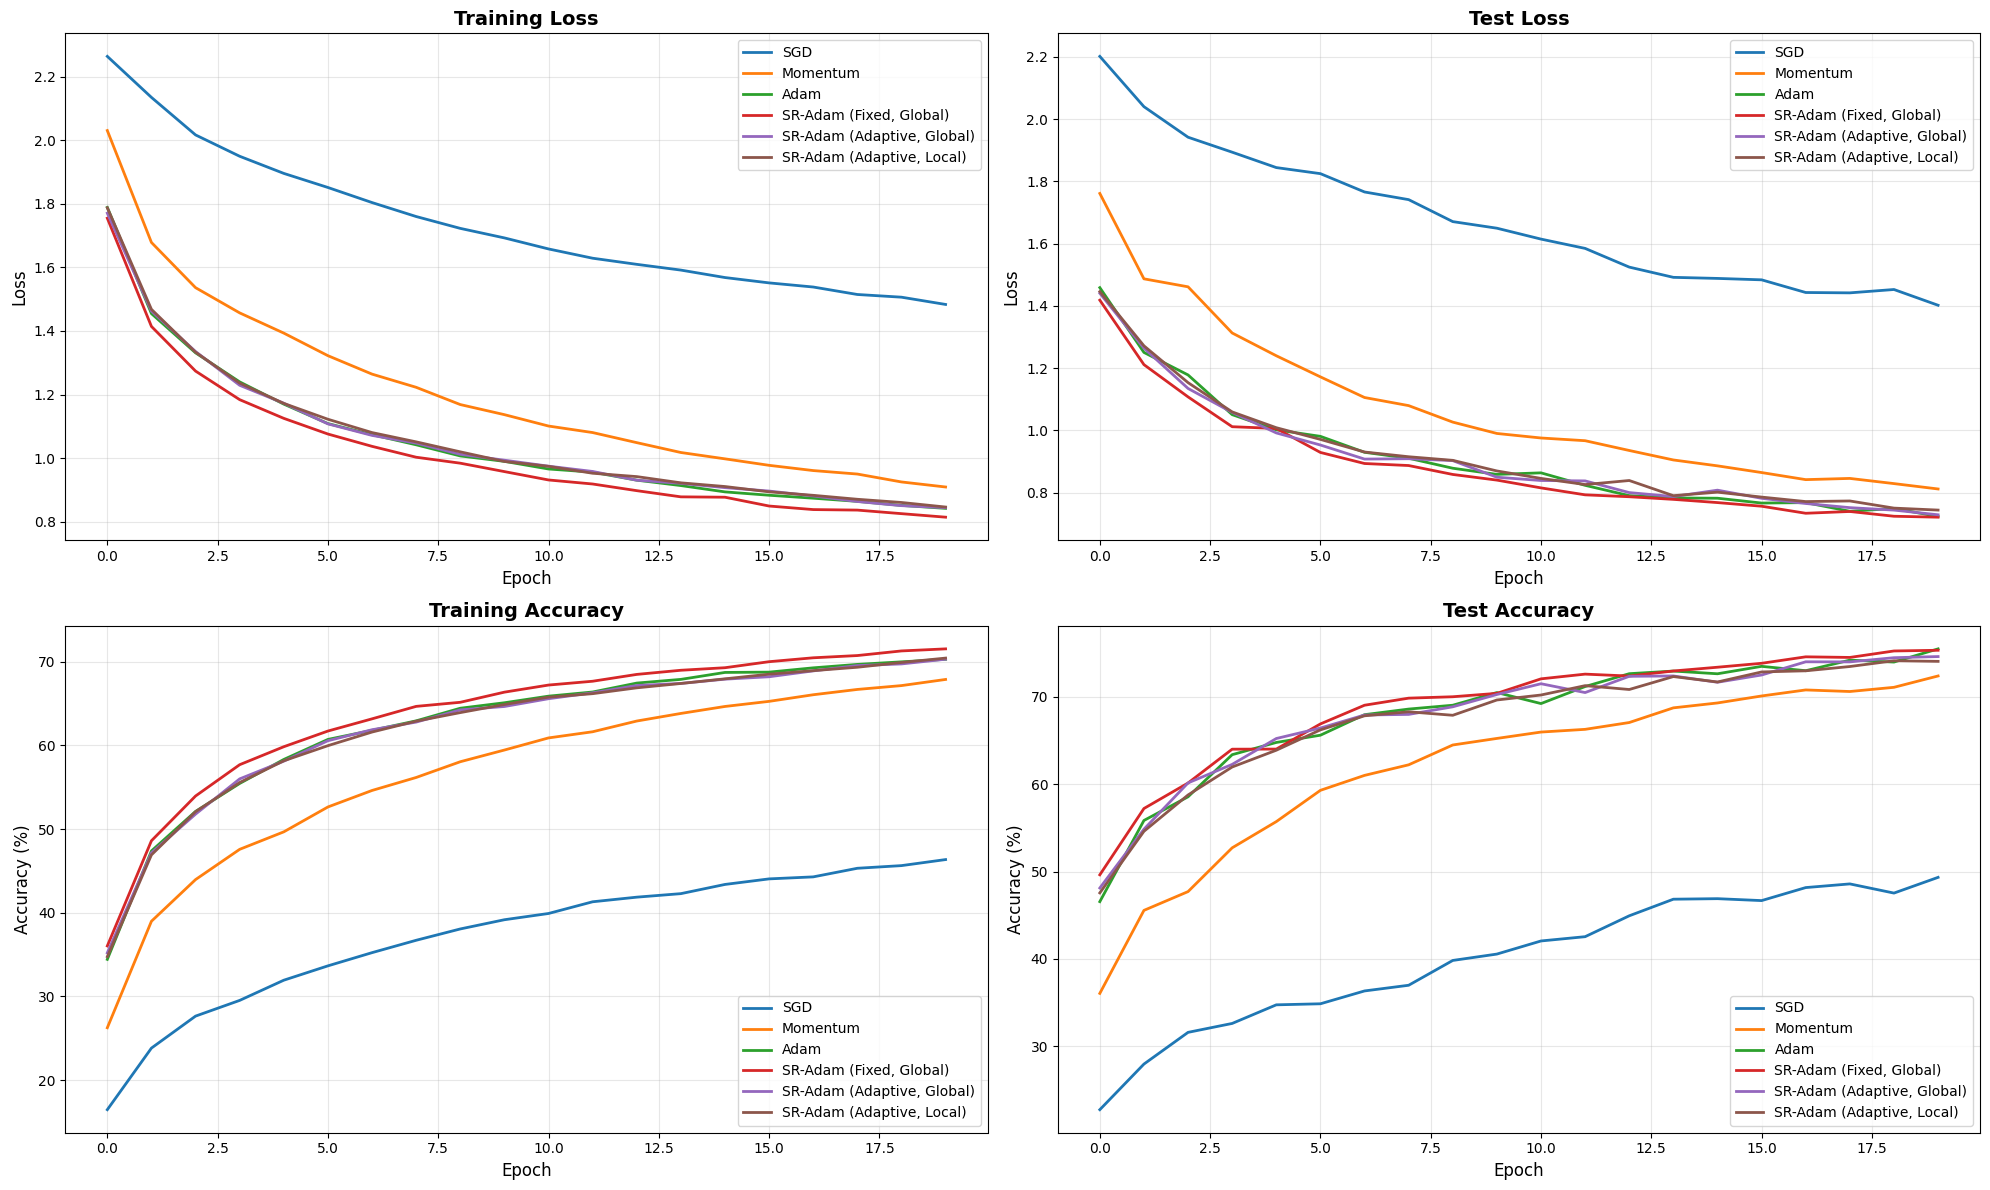


FINAL TEST ACCURACIES AND STATISTICS

SGD:
  Final Test Accuracy: 49.33%
  Best Test Accuracy:  49.33%
  Avg Epoch Time:      114.48s

Momentum:
  Final Test Accuracy: 72.38%
  Best Test Accuracy:  72.38%
  Avg Epoch Time:      113.96s

Adam:
  Final Test Accuracy: 75.48%
  Best Test Accuracy:  75.48%
  Avg Epoch Time:      119.66s

SR-Adam (Fixed, Global):
  Final Test Accuracy: 75.32%
  Best Test Accuracy:  75.32%
  Avg Epoch Time:      112.30s

SR-Adam (Adaptive, Global):
  Final Test Accuracy: 74.60%
  Best Test Accuracy:  74.60%
  Avg Epoch Time:      116.28s

SR-Adam (Adaptive, Local):
  Final Test Accuracy: 74.05%
  Best Test Accuracy:  74.12%
  Avg Epoch Time:      119.28s



In [2]:
%run main.py --dataset CIFAR10 --batch_size 512 --num_epochs 20 --noise 0.0

In [ ]:
%run main.py --dataset CIFAR10 --batch_size 512 --num_epochs 20 \
--noise 0.0 \
--optimizers "sradam_fixed|sradam_global|sradam_local"

Using device: cuda
GPU: NVIDIA GeForce RTX 3090
Random seeds set to 42

Loading CIFAR10 dataset...
Files already downloaded and verified
Files already downloaded and verified


c:\Users\m.amintoosi\.conda\envs\pth25gpu\lib\site-packages\torch\utils\data\dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Dataset loaded: 10 classes


ValueError: Unknown optimizers requested: ['SR-Adam (Adaptive', 'Global)', 'SR-Adam (Adaptive', 'Local)']

In [3]:
# %run main.py --dataset CIFAR10 --batch_size 512 --num_epochs 20 --noise 0.1

In [4]:
# %run main.py --dataset CIFAR100 --batch_size 512 --num_epochs 20 --noise 0.1